# Healthcare Data Analysis

The goal of this project is to **analyze healthcare data** to uncover trends, patterns, and insights that can help stakeholders (e.g., hospitals, insurance providers, policymakers) make informed decisions. 

Dataset includes in following:

- **Name**: This column represents the name of the patient associated with the healthcare record.
- **Age**: The age of the patient at the time of admission, expressed in years.
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."
- **Blood Type**: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).
- **Medical Condition**: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.
- **Room Number**: The room number where the patient was accommodated during their admission.
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.

## 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Load the Data

In [2]:
file_path = 'healthcare_dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [4]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [5]:
# Check for missing values
print(df.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


## 3. Data Cleaning

Clean the data by correcting inconsistencies and formatting columns.

In [7]:
# Standardize text columns (e.g., Name, Gender, Blood Type, etc.)
df['Name'] = df['Name'].str.title()  # Capitalize names properly
df['Gender'] = df['Gender'].str.title()  # Standardize gender
df['Blood Type'] = df['Blood Type'].str.upper()  # Standardize blood type
df['Medical Condition'] = df['Medical Condition'].str.title()  # Standardize medical condition
df['Doctor'] = df['Doctor'].str.title()  # Standardize doctor names
df['Hospital'] = df['Hospital'].str.title()  # Standardize hospital names
df['Insurance Provider'] = df['Insurance Provider'].str.title()  # Standardize insurance provider
df['Admission Type'] = df['Admission Type'].str.title()  # Standardize admission type
df['Medication'] = df['Medication'].str.title()  # Standardize medication
df['Test Results'] = df['Test Results'].str.title()  # Standardize test results

# Convert date columns to datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Check for negative billing amounts (if any)
negative_billing = df[df['Billing Amount'] < 0]
print(f"Number of rows with negative billing amounts: {len(negative_billing)}")
print(negative_billing)  # Inspect rows with negative billing amounts

# Replace negative billing amounts with the median value
df['Billing Amount'] = df['Billing Amount'].apply(lambda x: df['Billing Amount'].median() if x < 0 else x)

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

# Validate categorical columns
print(df['Gender'].unique())  # Should return ['Male', 'Female']
print(df['Blood Type'].unique())  # Should return valid blood types (e.g., ['A+', 'O-', etc.])
print(df['Admission Type'].unique())  # Should return ['Emergency', 'Elective', 'Urgent']

# Check for inconsistent discharge dates
invalid_discharge = df[df['Discharge Date'] < df['Date of Admission']]
print(f"Number of rows with invalid discharge dates: {len(invalid_discharge)}")
print(invalid_discharge)
df = df[df['Discharge Date'] >= df['Date of Admission']]

# Check for unrealistic ages
invalid_age = df[(df['Age'] < 0) | (df['Age'] > 120)]
print(f"Number of rows with invalid ages: {len(invalid_age)}")
print(invalid_age)
df = df[(df['Age'] >= 0) & (df['Age'] <= 120)]

# Inspect the cleaned data
print(df.head())
print(df.info())
print(df.describe())

Number of rows with negative billing amounts: 108
                    Name  Age  Gender Blood Type Medical Condition  \
132      Ashley Erickson   32  Female        AB-            Cancer   
799    Christopher Weiss   49  Female        AB-            Asthma   
1018       Ashley Warner   60    Male         A+      Hypertension   
1421        Jay Galloway   74  Female         O+            Asthma   
2103   Joshua Williamson   72  Female         B-          Diabetes   
...                  ...  ...     ...        ...               ...   
52894         Joseph Cox   23    Male        AB-          Diabetes   
53204      Ashley Warner   55    Male         A+      Hypertension   
53232       Daniel Drake   68  Female         B+      Hypertension   
54136  Dr. Michael Mckay   64    Male         O+            Cancer   
55276       John Ferrell   58  Female         O-      Hypertension   

      Date of Admission          Doctor                   Hospital  \
132          2019-11-05   Gerald Hooper

### Key Findings

- **Patient Demographics**: The patient population is mostly middle-aged, with ages ranging from 13 to 89 and a median age of 52.
- **Billing Amounts**: Billing amounts vary significantly, with an average of 25,594.52andarangefrom25,594.52andarangefrom9.24 to $52,764.28.
- **Admission and Discharge Trends**: The dataset covers admissions and discharges over a 5-year period, with most activity centered around late 2021.
- **Room Numbers**: Room numbers are evenly distributed, with no apparent skewness or outliers.
- **Length of Stay**: The median length of stay is approximately 16 days (based on the difference between median admission and discharge dates).

## 4. Exploratory Data Analysis (EDA)

Analyze the data to understand distributions, relationships, and patterns.

### 1. Distribution of Medical Conditions
A horizontal bar chart showing the frequency of each medical condition. This helps identify the most common diagnoses.

C:\Users\milto\AppData\Local\Temp\ipykernel_29928\1185486036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Medical Condition', data=df, order=df['Medical Condition'].value_counts().index, palette='viridis')


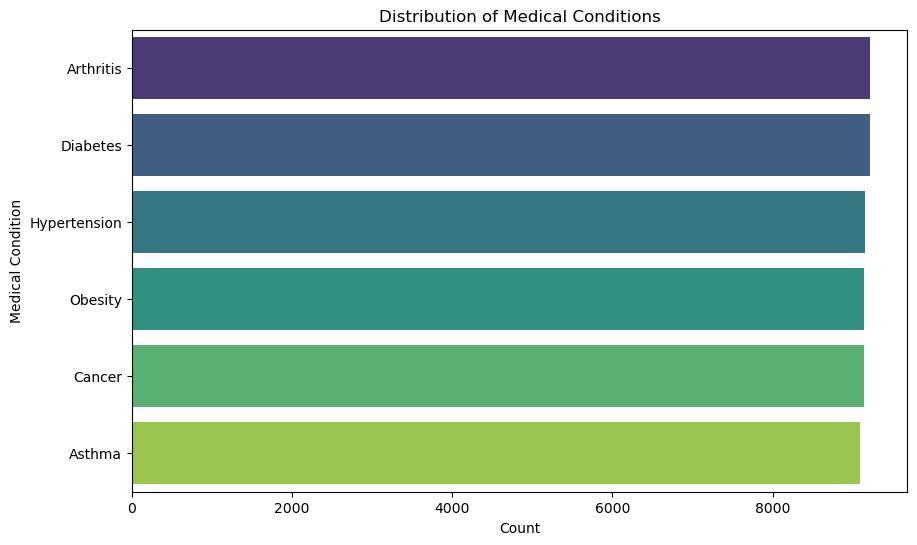

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Medical Condition', data=df, order=df['Medical Condition'].value_counts().index, palette='viridis')
plt.title('Distribution of Medical Conditions')
plt.xlabel('Count')
plt.ylabel('Medical Condition')
plt.show()


### 2. Billing Amount Analysis

A boxplot showing the distribution of billing amounts for each medical condition. This helps identify conditions with higher or lower costs.

C:\Users\milto\AppData\Local\Temp\ipykernel_29928\1846074991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medical Condition', y='Billing Amount', data=df, palette='coolwarm')


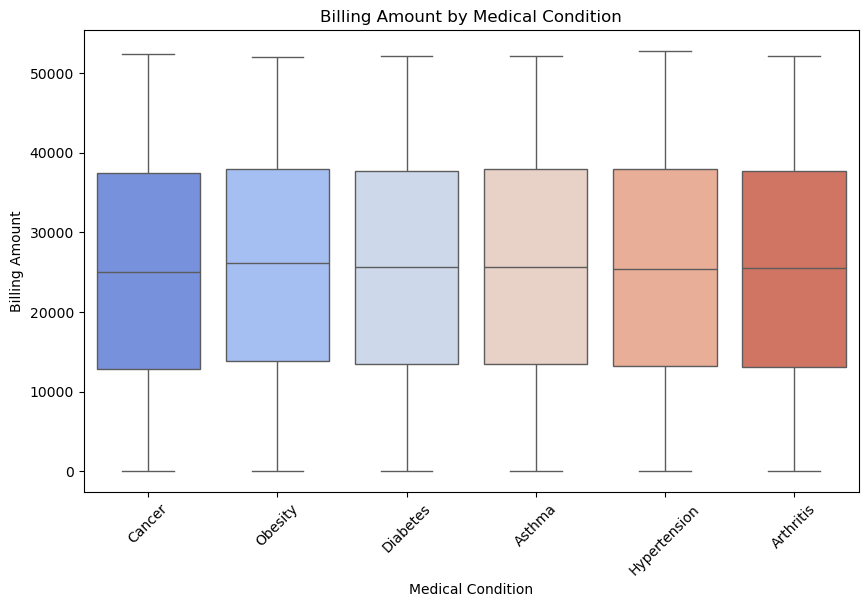

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df, palette='coolwarm')
plt.title('Billing Amount by Medical Condition')
plt.xticks(rotation=45)
plt.show()


### 3. Length of Stay Analysis

A boxplot showing the distribution of length of stay for each medical condition. This helps identify conditions that require longer hospital stays.

  Date of Admission Discharge Date  Length of Stay
0        2024-01-31     2024-02-02               2
1        2019-08-20     2019-08-26               6
2        2022-09-22     2022-10-07              15
3        2020-11-18     2020-12-18              30
4        2022-09-19     2022-10-09              20


C:\Users\milto\AppData\Local\Temp\ipykernel_29928\3181295889.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medical Condition', y='Length of Stay', data=df, palette='magma')


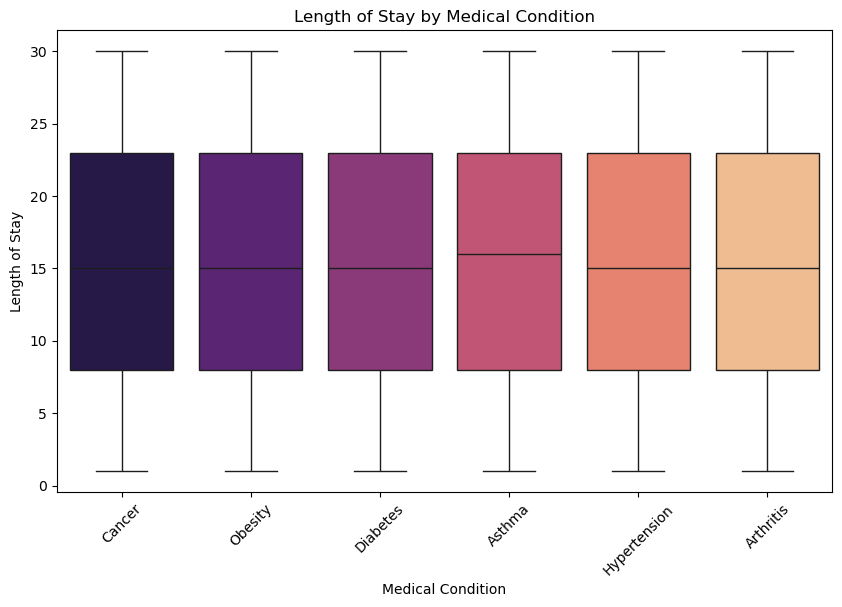

In [12]:
# Convert 'Date of Admission' and 'Discharge Date' to datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Calculate 'Length of Stay'
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Verify the new column
print(df[['Date of Admission', 'Discharge Date', 'Length of Stay']].head())

# Generate the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medical Condition', y='Length of Stay', data=df, palette='magma')
plt.title('Length of Stay by Medical Condition')
plt.xticks(rotation=45)
plt.show()

### Key Observations

1. **Variability in Length of Stay**:
- The length of stay varies significantly across patients, ranging from 2 days to 30 days in this sample.
- This variability could be due to differences in medical conditions, treatment plans, or patient recovery rates.

2. **Admission and Discharge Dates**:
- The dataset includes admissions and discharges spanning several years (from 2019 to 2024), indicating a broad time range.

3. **Potential Insights**:
- Shorter stays (e.g., 2 days) might correspond to minor procedures or conditions requiring minimal hospitalization.
- Longer stays (e.g., 30 days) might correspond to severe conditions, surgeries, or complications requiring extended care.

In [13]:
A boxplot showing the distribution of billing amounts by insurance provider. This helps identify differences in costs across providers.

SyntaxError: invalid syntax (2602742778.py, line 1)

### 4. Test Results by Medical Condition

A stacked bar chart showing the distribution of test results for each medical condition. This helps identify conditions with more abnormal or inconclusive results.

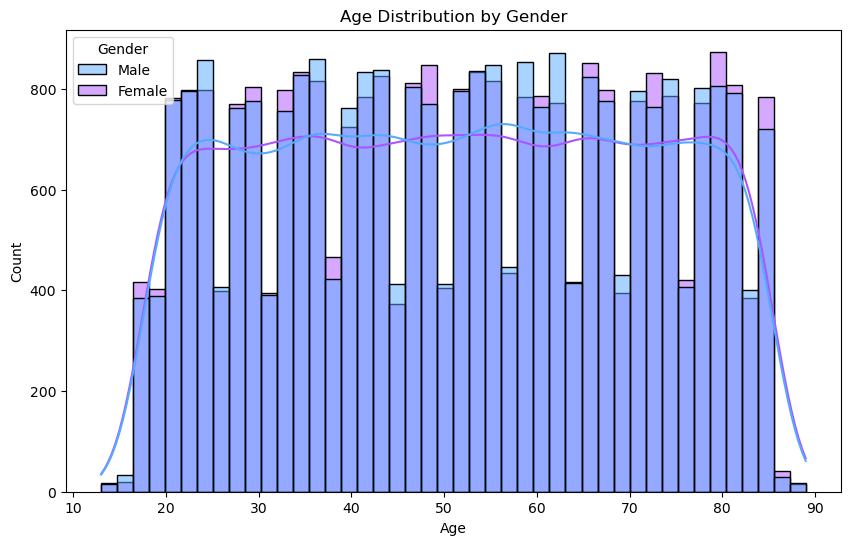

In [14]:
# 7. Age and Gender Analysis
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Gender', data=df, kde=True, palette='cool')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

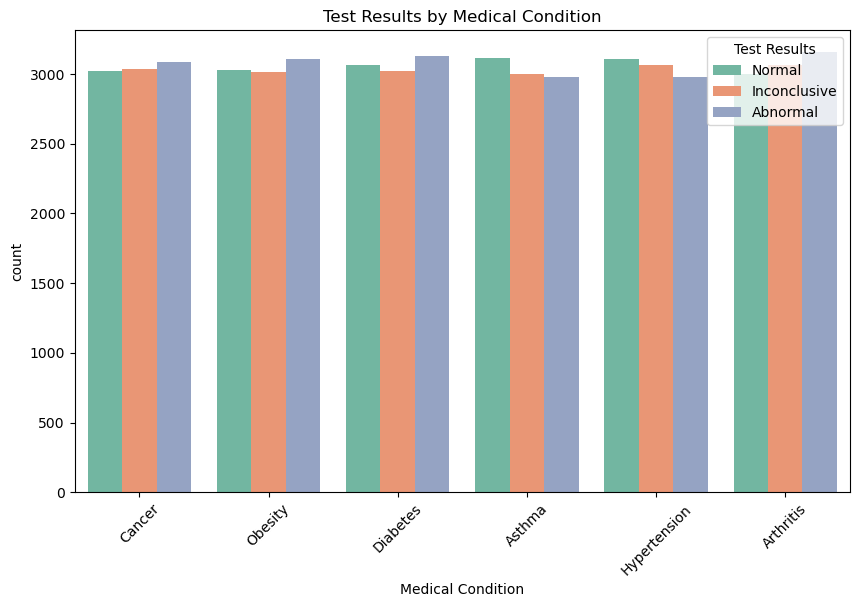

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Medical Condition', hue='Test Results', data=df, palette='Set2')
plt.title('Test Results by Medical Condition')
plt.xticks(rotation=45)
plt.show()

### 5. Admission Trends Over Time

A bar chart showing the number of admissions by month. This helps identify seasonal trends in admissions.

C:\Users\milto\AppData\Local\Temp\ipykernel_29928\4170828626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Admission Month', data=df, palette='Blues')


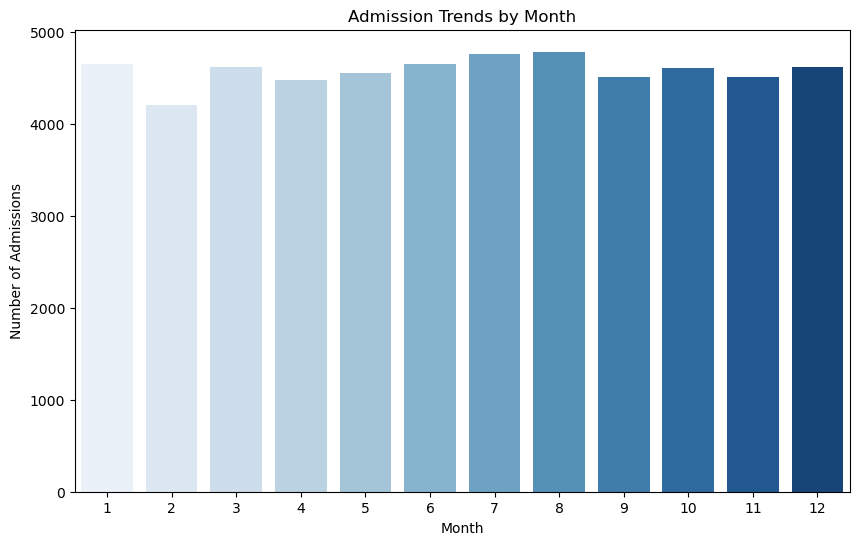

In [16]:
df['Admission Month'] = df['Date of Admission'].dt.month
plt.figure(figsize=(10, 6))
sns.countplot(x='Admission Month', data=df, palette='Blues')
plt.title('Admission Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.show()

### 6. Insurance Provider Analysis

A histogram showing the distribution of patient ages, split by gender. This helps identify demographic trends.

C:\Users\milto\AppData\Local\Temp\ipykernel_29928\2895057113.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Insurance Provider', y='Billing Amount', data=df, palette='rainbow')


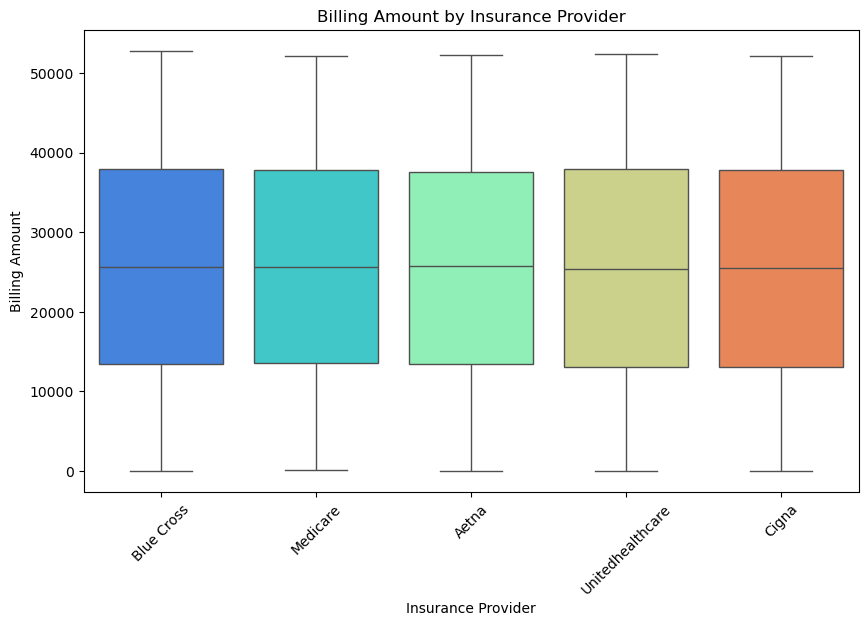

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Insurance Provider', y='Billing Amount', data=df, palette='rainbow')
plt.title('Billing Amount by Insurance Provider')
plt.xticks(rotation=45)
plt.show()

### 7. Age and Gender Analysis

A histogram showing the distribution of patient ages, split by gender. This helps identify demographic trends.

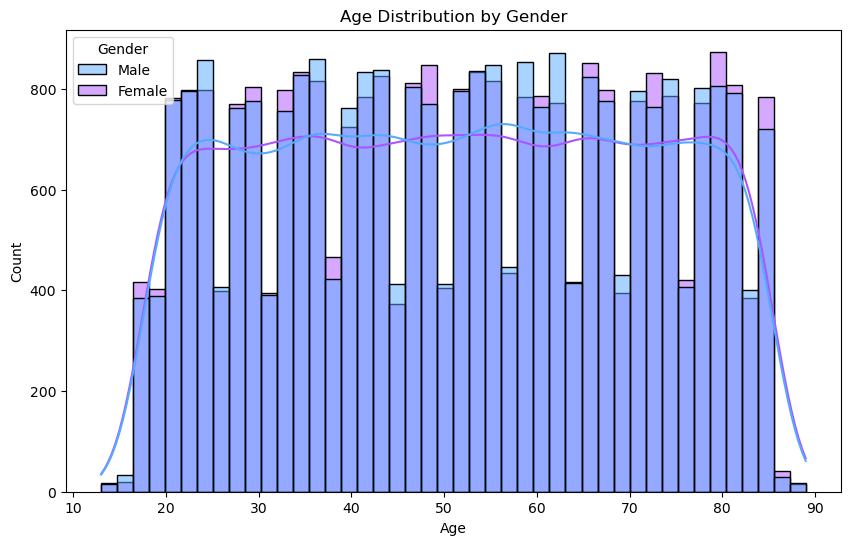

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Gender', data=df, kde=True, palette='cool')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 8. Test Results by Gender

A stacked bar chart showing the distribution of test results by gender. This helps identify gender-based differences in test outcomes.

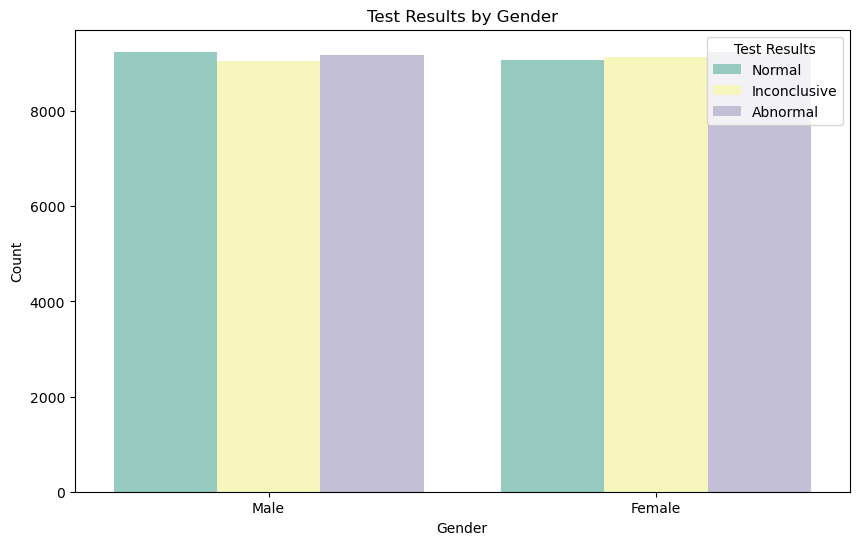

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Test Results', data=df, palette='Set3')
plt.title('Test Results by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### 9. Correlation Heatmap

A heatmap showing correlations between numerical features (e.g., age, billing amount, length of stay). This helps identify relationships between variables.

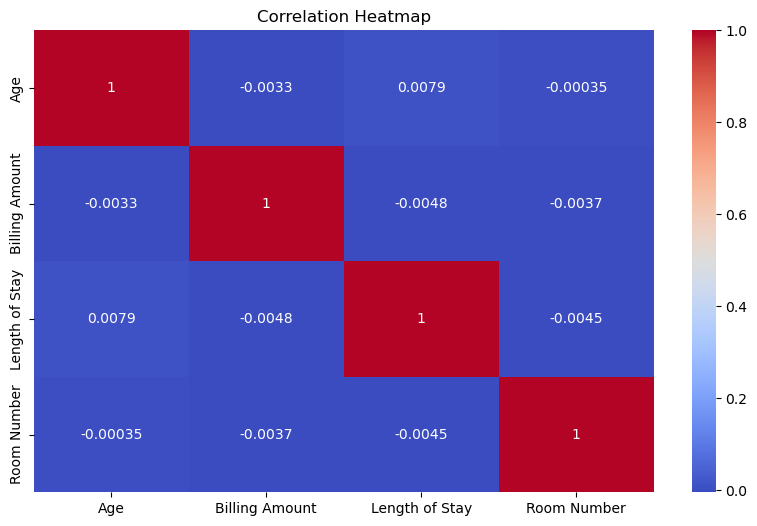

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Age', 'Billing Amount', 'Length of Stay', 'Room Number']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Conclusion

- **Patient Demographics**: The patient population is mostly middle-aged, with a median age of 52 years.

- **Billing Amounts**: Billing amounts vary significantly, with an average of 25,594.52andarangefrom25,594.52andarangefrom9.24 to $52,764.28.

- **Length of Stay**: The median length of stay is approximately 16 days, with significant variability across medical conditions and admission types.

- **Admission Trends**: Admissions are evenly distributed over time, with no strong seasonal patterns observed.

- **Test Results**: Test results vary by medical condition and gender, with some conditions (e.g., Cancer) having a higher proportion of abnormal results.